In [1]:
import awkward as ak
import numpy as np
import coffea
import os
from plugins import handleData

print(coffea.__version__)
from coffea import util
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema

import hist

# testFiles = [
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_170to300_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/120000/0CDD30E0-B953-E54B-BB7A-BFB45BE6EC93.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_300to470_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/120000/3788BBD3-3B70-BE48-B01A-4FA395E1E0B6.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_470to600_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/70000/F6B6A983-3E2B-7B4D-A2CE-E03AB6E32387.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_600to800_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/70000/FDF7FBE4-9226-994A-BD45-29995A3CD62F.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_800to1000_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/70000/2CEB03D7-5B1A-EE46-9C21-13ED3E349AF4.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/70000/DB87A517-0584-1A41-BB18-AAE7C9AAE5B8.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_1400to1800_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/280000/BFE2E7E9-82CB-FE47-9B43-EBA5C373AF60.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_1800to2400_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/70000/5213B536-BAA1-CC43-A58A-B1E41E2680F5.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_2400to3200_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/280000/E8400F91-3216-EA46-A9F1-8CC7EF5261B0.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_3200toInf_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/280000/B21BFDD8-B878-784C-AFB6-5CDE131F5C39.root"
# ]

# redirector = 'root://xcache/'
# files = handleData('fileset_QCD.json', redirector, testing = True, data = False)
# # # files_test = handleData('fileset_QCD.json', redirector, testing = False, data = False)

# events = NanoEventsFactory.from_root(list(files.values())[9][0], schemaclass=NanoAODSchema).events()
# # print(files)
# #may have to put in weights by hand
# print(events.Generator.weight)

0.7.11


In [2]:
from plugins import *
from jetProcessors import makeDijetHists
from dask.distributed import Client
import pickle
#### WE'RE MISSING 2016B ver2 -- AK8 PF HLT is missing need to use AK4 trigger isntead

data_bool = True
winterfell = True
processor = makeDijetHists(data = data_bool)
datastring = "JetHT" if processor.do_gen == False else "QCDsim"
if processor.do_gen==True and winterfell:
    filename = "QCD_flat_files.json"
elif processor.do_gen==True:
    filename = "fileset_QCD.json"
else:
    filename = "datasets_UL_NANOAOD.json"
fname = 'coffeaOutput/dijetHists_{}_{}_{}_NewHist.pkl'.format(datastring, processor.ptcut, processor.etacut)
result = runCoffeaJob(processor, jsonFile = filename, winterfell = winterfell, testing = True, data = not processor.do_gen)
with open(fname, "wb") as f:
    pickle.dump( result, f)

0.7.11
2.5.2
Data:  True  gen  False
Era:  -UL2016
Era:  HIPM_UL2016
Era:  UL2017
Era:  UL2018
dataset =  /JetHT/Run2016B-ver1_HIPM_UL2016_MiniAODv2_NanoAODv9-v2/NANOAOD
dataset =  /JetHT/Run2016C-HIPM_UL2016_MiniAODv2_NanoAODv9-v2/NANOAOD
dataset =  /JetHT/Run2016D-HIPM_UL2016_MiniAODv2_NanoAODv9-v2/NANOAOD
dataset =  /JetHT/Run2016E-HIPM_UL2016_MiniAODv2_NanoAODv9-v2/NANOAOD
dataset =  /JetHT/Run2016F-HIPM_UL2016_MiniAODv2_NanoAODv9-v2/NANOAOD
dataset =  /JetHT/Run2016F-UL2016_MiniAODv2_NanoAODv9-v1/NANOAOD
dataset =  /JetHT/Run2016H-UL2016_MiniAODv2_NanoAODv9-v1/NANOAOD
dataset =  /JetHT/Run2017B-UL2017_MiniAODv2_NanoAODv9-v1/NANOAOD
dataset =  /JetHT/Run2017C-UL2017_MiniAODv2_NanoAODv9-v1/NANOAOD
dataset =  /JetHT/Run2017D-UL2017_MiniAODv2_NanoAODv9-v1/NANOAOD
dataset =  /JetHT/Run2017E-UL2017_MiniAODv2_NanoAODv9-v1/NANOAOD
dataset =  /JetHT/Run2017F-UL2017_MiniAODv2_NanoAODv9-v1/NANOAOD
dataset =  /JetHT/Run2018A-UL2018_MiniAODv2_NanoAODv9-v2/NANOAOD
dataset =  /JetHT/Run2018B-UL2

Preprocessing:   0%|          | 0/14 [00:00<?, ?file/s]

Processing:   0%|          | 0/181 [00:00<?, ?chunk/s]

Lenght of events  98181 length of weights  98181
IOV  2018 , era  Run2018B
Trigger year  2018
Trigger: len of events  74110 len of weights  74110
[350, 3.4e+04, 1.5e+03, 3.4e+04, 3.4e+04, ... 1.05e+03, 245, 3.4e+04, 1.05e+03, 245]
Reco sel: len of events  1438 len of weights  1438
Reco kine/topo sel: len of events  1368 len of weights  1368
Lenght of events  98181 length of weights  98181
IOV  2018 , era  Run2018B
Trigger year  2018
Trigger: len of events  71286 len of weights  71286
[245, 245, 3.4e+04, 3.4e+04, 1.05e+03, ... 3.4e+04, 48, 3.4e+04, 48, 3.4e+04]
Reco sel: len of events  1484 len of weights  1484
Reco kine/topo sel: len of events  1415 len of weights  1415
Lenght of events  98181 length of weights  98181
IOV  2018 , era  Run2018B
Trigger year  2018
Trigger: len of events  72969 len of weights  72969
[245, 245, 1.05e+03, 1.05e+03, 245, 3.4e+04, ... 350, 3.4e+04, 350, 1.5e+03, 3.4e+04]
Reco sel: len of events  1569 len of weights  1569
Reco kine/topo sel: len of events  148

Lenght of events  100531 length of weights  100531
IOV  2018 , era  Run2018A
Trigger year  2018
Trigger: len of events  73243 len of weights  73243
[1.05e+03, 128, 128, 245, 245, 48, 245, ... 1.5e+03, 350, 128, 48, 350, 3.4e+04]
Reco sel: len of events  1323 len of weights  1323
Reco kine/topo sel: len of events  1257 len of weights  1257
Lenght of events  100531 length of weights  100531
IOV  2018 , era  Run2018A
Trigger year  2018
Trigger: len of events  73735 len of weights  73735
[350, 48, 350, 350, 350, 16, 350, ... 3.4e+04, 3.4e+04, 48, 210, 3.4e+04, 900]
Reco sel: len of events  1643 len of weights  1643
Reco kine/topo sel: len of events  1565 len of weights  1565
Lenght of events  100531 length of weights  100531
IOV  2018 , era  Run2018A
Trigger year  2018
Trigger: len of events  77922 len of weights  77922
[210, 3.4e+04, 128, 3.4e+04, 3.4e+04, ... 1.5e+03, 3.4e+04, 1.5e+03, 3.4e+04]
Reco sel: len of events  1599 len of weights  1599
Reco kine/topo sel: len of events  1516 len

Reco kine/topo sel: len of events  2086 len of weights  2086
Lenght of events  101448 length of weights  101448
IOV  2017 , era  Run2017F
Trigger year  2017
Trigger: len of events  66325 len of weights  66325
[5.88e+04, 112, 2.5e+03, 2.5e+03, 5.88e+04, 2.5e+03, ... 1.47e+04, 90, 28, 550, 90]
Reco sel: len of events  2080 len of weights  2080
Reco kine/topo sel: len of events  1981 len of weights  1981
Lenght of events  101448 length of weights  101448
IOV  2017 , era  Run2017F
Trigger year  2017
Trigger: len of events  63296 len of weights  63296
[1.47e+04, 550, 90, 1.47e+04, 1.47e+04, ... 90, 1.47e+04, 1.47e+04, 1.47e+04, 28]
Reco sel: len of events  1910 len of weights  1910
Reco kine/topo sel: len of events  1826 len of weights  1826
Lenght of events  101448 length of weights  101448
IOV  2017 , era  Run2017F
Trigger year  2017
Trigger: len of events  65422 len of weights  65422
[1.47e+04, 90, 90, 1.47e+04, 1.47e+04, 90, ... 47, 6.76e+04, 8, 6.76e+04, 129, 129]
Reco sel: len of even

Trigger: len of events  58324 len of weights  58324
[1.44e+03, 75, 1.44e+03, 1.71e+04, 1.71e+04, ... 1.44e+03, 1.71e+04, 1.71e+04, 270]
Reco sel: len of events  2228 len of weights  2228
Reco kine/topo sel: len of events  2121 len of weights  2121
Lenght of events  101566 length of weights  101566
IOV  2017 , era  Run2017D
Trigger year  2017
Trigger: len of events  56082 len of weights  56082
[1.44e+03, 28, 1.44e+03, 1.71e+04, 75, 270, ... 270, 270, 270, 270, 75, 1.71e+04]
Reco sel: len of events  1944 len of weights  1944
Reco kine/topo sel: len of events  1828 len of weights  1828
Lenght of events  101566 length of weights  101566
IOV  2017 , era  Run2017D
Trigger year  2017
Trigger: len of events  54372 len of weights  54372
[1.71e+04, 270, 75, 1.71e+04, 270, ... 1.71e+04, 270, 1.71e+04, 1.44e+03, 1.44e+03]
Reco sel: len of events  1881 len of weights  1881
Reco kine/topo sel: len of events  1797 len of weights  1797
Lenght of events  101566 length of weights  101566
IOV  2017 , era

Trigger year  2017
Trigger: len of events  43613 len of weights  43613
[4.8e+04, 4.8e+04, 4.8e+04, 4.8e+04, 4.8e+04, ... 4.8e+04, 4.8e+04, 180, 4.8e+04]
Reco sel: len of events  2342 len of weights  2342
Reco kine/topo sel: len of events  2206 len of weights  2206
Lenght of events  98284 length of weights  98284
IOV  2017 , era  Run2017B
Trigger year  2017
Trigger: len of events  43887 len of weights  43887
[4.8e+04, 20, 20, 4.8e+04, 4.8e+04, ... 4.8e+04, 4.8e+04, 4.8e+04, 180, 4.8e+04]
Reco sel: len of events  2320 len of weights  2320
Reco kine/topo sel: len of events  2201 len of weights  2201
Lenght of events  98284 length of weights  98284
IOV  2017 , era  Run2017B
Trigger year  2017
Trigger: len of events  44168 len of weights  44168
[50, 180, 4.8e+04, 4.8e+04, 4.8e+04, 4.8e+04, ... 180, 4.8e+04, 4.8e+04, 4.8e+04, 8]
Reco sel: len of events  2357 len of weights  2357
Reco kine/topo sel: len of events  2238 len of weights  2238
Lenght of events  98284 length of weights  98284
IOV 

Trigger year  2016
Trigger: len of events  72951 len of weights  72951
[1.2e+03, 6e+03, 8e+04, 2.4e+05, 1.2e+03, ... 3.96e+04, 4.08e+03, 24, 4.08e+03, 612]
Reco sel: len of events  1627 len of weights  1627
Reco kine/topo sel: len of events  1543 len of weights  1543
Lenght of events  97985 length of weights  97985
IOV  2016 , era  Run2016H
Trigger year  2016
Trigger: len of events  69075 len of weights  69075
[73, 4.08e+03, 4.08e+03, 4.08e+03, 3.96e+04, ... 612, 1.22e+05, 3.96e+04, 4.08e+03]
Reco sel: len of events  1646 len of weights  1646
Reco kine/topo sel: len of events  1572 len of weights  1572
Lenght of events  97985 length of weights  97985
IOV  2016 , era  Run2016H
Trigger year  2016
Trigger: len of events  69341 len of weights  69341
[1, 24, 3.96e+04, 612, 73, 4.08e+03, 612, ... 3.5e+04, 540, 540, 3.6e+03, 540, 540]
Reco sel: len of events  1590 len of weights  1590
Reco kine/topo sel: len of events  1521 len of weights  1521
Lenght of events  97985 length of weights  97985

Trigger year  2016
Trigger: len of events  59704 len of weights  59704
[80, 2.5e+04, 700, 8e+03, 80, 8e+03, ... 1.1e+05, 3.5e+04, 336, 336, 3.5e+04]
Reco sel: len of events  1056 len of weights  1056
Reco kine/topo sel: len of events  1001 len of weights  1001
Lenght of events  97430 length of weights  97430
IOV  2016 , era  Run2016F
Trigger year  2016
Trigger: len of events  68074 len of weights  68074
[336, 336, 1.1e+05, 3.4e+03, 1.1e+05, 336, ... 1.1e+05, 336, 336, 3.5e+04, 3.4e+03]
Reco sel: len of events  1372 len of weights  1372
Reco kine/topo sel: len of events  1299 len of weights  1299
Lenght of events  97430 length of weights  97430
IOV  2016 , era  Run2016F
Trigger year  2016
Trigger: len of events  70174 len of weights  70174
[3.4e+03, 1.1e+05, 336, 3.4e+03, 3.5e+04, ... 90, 4.8e+03, 1.5e+05, 5e+04, 1.5e+05]
Reco sel: len of events  1373 len of weights  1373
Reco kine/topo sel: len of events  1302 len of weights  1302
Lenght of events  97430 length of weights  97430
IOV  2

Trigger: len of events  72983 len of weights  72983
[4.8e+03, 800, 10, 4.8e+03, 5e+04, 4.8e+03, ... 72, 24, 3.4e+03, 3.5e+04, 3.4e+03]
Reco sel: len of events  1535 len of weights  1535
Reco kine/topo sel: len of events  1452 len of weights  1452
Lenght of events  97493 length of weights  97493
IOV  2016 , era  Run2016E
Trigger year  2016
Trigger: len of events  72322 len of weights  72322
[3.5e+04, 3.4e+03, 336, 8, 3.4e+03, 1.1e+05, ... 72, 336, 3.5e+04, 24, 1.1e+05, 72]
Reco sel: len of events  1498 len of weights  1498
Reco kine/topo sel: len of events  1411 len of weights  1411
Lenght of events  97493 length of weights  97493
IOV  2016 , era  Run2016E
Trigger year  2016
Trigger: len of events  72498 len of weights  72498
[3.4e+03, 1.1e+05, 1.1e+05, 336, 1.1e+05, 336, ... 7, 2.8e+03, 3e+04, 21, 2.8e+03]
Reco sel: len of events  1444 len of weights  1444
Reco kine/topo sel: len of events  1361 len of weights  1361
Lenght of events  97493 length of weights  97493
IOV  2016 , era  Run2

In [6]:
fname = 'coffeaOutput/dijetHists_QCDsim_30.0_2.5_NewHist.pkl'
with open(fname, "rb") as f:
    result = pickle.load( f )
import matplotlib.pyplot as plt
%matplotlib inline
#import mplhep as hep
plt.rcParams["figure.figsize"] = (10,10)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fc0389678e0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

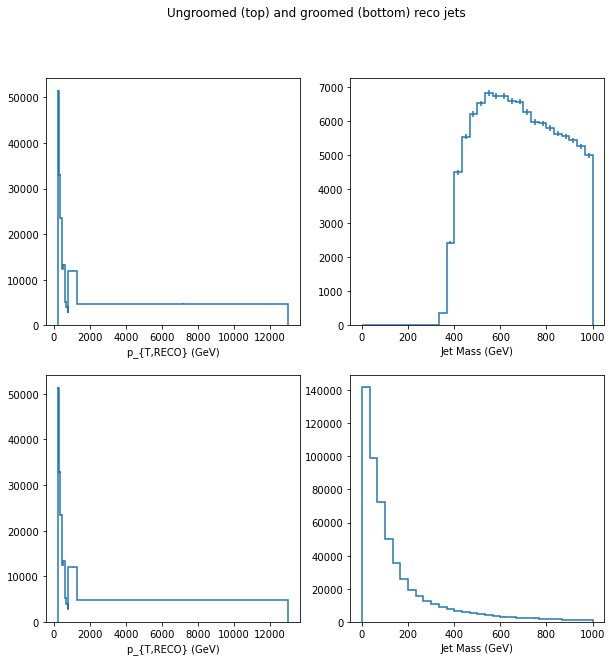

In [7]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Ungroomed (top) and groomed (bottom) reco jets')
result['jet_pt_mass_reco_u'][{'dataset':sum}].project('ptreco').plot1d(ax=axs[0,0])
result['jet_pt_mass_reco_u'][{'dataset':sum}].project('mreco').plot1d(ax=axs[0,1])
result['jet_pt_mass_reco_g'][{'dataset':sum}].project('ptreco').plot1d(ax=axs[1,0])
result['jet_pt_mass_reco_g'][{'dataset':sum}].project('mreco').plot1d(ax=axs[1,1])

[48100. 36032. 29639. 17910. 22783. 10299.  9116.  6580. 44428. 54681.] [ 90868.  74364.  66264.  43364.  58435.  28173.  25709.  19906. 157711.
 540406.]


Text(0.5, 0.98, 'Gluon content as a function of pT')

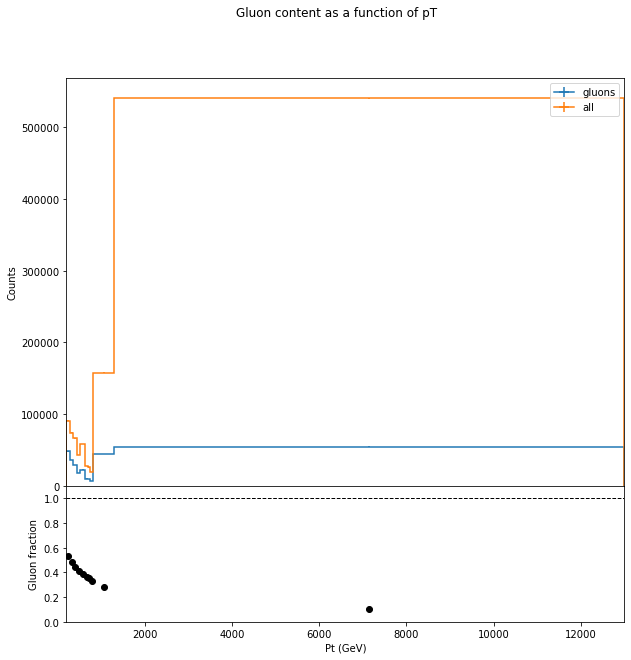

In [8]:
numerator = result['jet_pt'][{'partonFlav':'Gluon'}].project('ptreco')
denominator = result['jet_pt'].project('ptreco')
print(numerator.values(), denominator.values())

numerator.label = r'$\epsilon$'
fig = plt.gcf()
grid = fig.add_gridspec(2, 1, hspace=0, height_ratios=[3, 1])

main_ax = fig.add_subplot(grid[0])
subplot_ax = fig.add_subplot(grid[1], sharex=main_ax)
plt.setp(main_ax.get_xticklabels(), visible=False)
main_ax, sublot_ax = numerator.plot_ratio(
    denominator,
    rp_num_label="gluons",
    rp_denom_label="all",
    rp_uncert_draw_type="line",
    rp_uncertainty_type="efficiency",
    ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax}
)

plt.xlabel("Pt (GeV)")
plt.ylabel("Gluon fraction")
fig.suptitle('Gluon content as a function of pT')

[25898. 25827. 24621. 23136. 22165. 20652. 18761. 17436. 15946. 14066.
 12659. 11131.  9665.  8813.  7911.  7142.  6291.  5165.  4318.  3823.
  3081.  2750.  2184.  1881.  1276.] [144123. 133209. 118388. 101889.  88437.  76631.  66147.  57931.  50870.
  43836.  38178.  32794.  27840.  24557.  21916.  20454.  17360.  14557.
  12472.  10753.   9002.   7844.   6601.   5477.   3992.]


Text(0.5, 1.0, 'Gluon content as a function of eta')

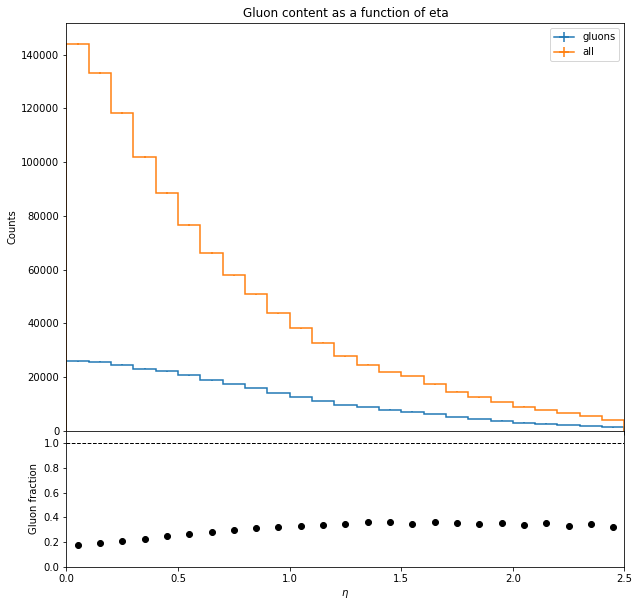

In [9]:
numerator = result['jet_eta'][{'partonFlav':'Gluon'}].project('eta')
denominator = result['jet_eta'].project('eta')
print(numerator.values(), denominator.values())
numerator.label = r'$\epsilon$'
numerator.label = r'$\epsilon$'
fig = plt.gcf()
grid = fig.add_gridspec(2, 1, hspace=0, height_ratios=[3, 1])

main_axis = fig.add_subplot(grid[0])
ratio_ax = fig.add_subplot(grid[1], sharex=main_axis)
plt.setp(main_axis.get_xticklabels(), visible=False)
main_ax, sublot_ax = numerator.plot_ratio(
    denominator,
    rp_num_label="gluons",
    rp_denom_label="all",
    rp_uncert_draw_type="line",
    rp_uncertainty_type="efficiency",
    ax_dict = {"main_ax":main_axis,"ratio_ax":ratio_ax}
)

plt.xlabel(r'$\eta$')
plt.ylabel("Gluon fraction")
main_axis.set_title('Gluon content as a function of eta')


Text(0.5, 0.98, 'Dijet eta <2.5, pt> 200.')

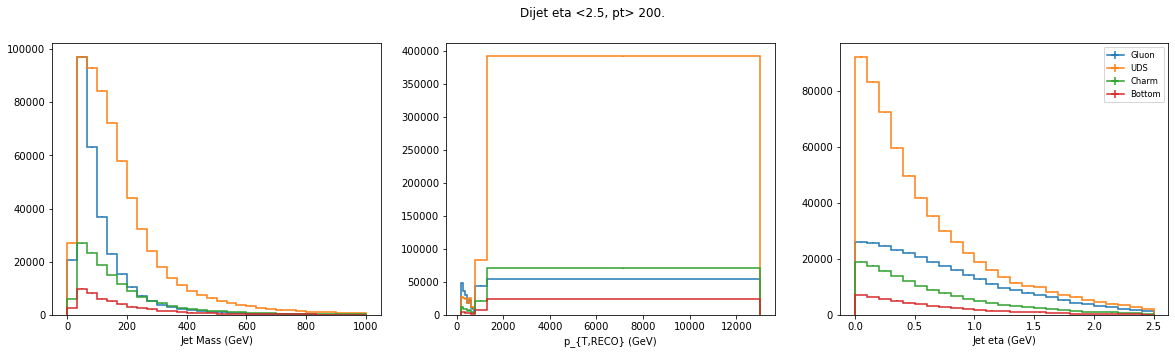

In [10]:
#sum entries in bins --> plot as y-axis
plt.rcParams["figure.figsize"] = (20,5)


fig, axs = plt.subplots(1, 3)
result['jet_mass'][{'jetNumb':sum, 'dataset':sum}].plot1d(ax = axs[0], overlay='partonFlav')
plt.rc('legend',fontsize='small')
plt.xlabel("Jet mass (GeV)")
result['jet_pt'][{'jetNumb':sum, 'dataset':sum}].plot1d(ax = axs[1], overlay='partonFlav')
plt.rc('legend',fontsize='small')
#axs[0].set_xlabel("Jet mass (GeV)")
plt.xlabel("Jet pT (GeV)")
result['jet_eta'][{'jetNumb':sum, 'dataset':sum}].plot1d(ax = axs[2], overlay='partonFlav')
plt.rc('legend',fontsize='small')
plt.legend()
plt.xlabel("Jet eta (GeV)")

fig.suptitle('Dijet eta <2.5, pt> 200.', fontsize="large")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Hist(
  StrCategory(['/RunIISummer20UL18NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/', '/RunIISummer20UL17NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/', '/RunIISummer20UL16NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/'], growth=True, name='dataset', label='Dataset'),
  StrCategory(['jet1', 'jet2'], growth=True, name='jetNumb', label='Jet'),
  StrCategory(['Gluon', 'UDS', 'Charm', 'Bottom'], growth=True, name='partonFlav', label='Parton Flavour'),
  Regular(30, 0, 1000, name='mreco', label='Jet Mass (GeV)'),
  storage=Weight()) # Sum: WeightedSum(value=1.12734e+06, variance=1.12734e+06) (WeightedSum(value=1.13538e+06, variance=1.13538e+06) with flow)


Text(0.5, 0.98, 'Dijet eta <2.5, pt> 200.')

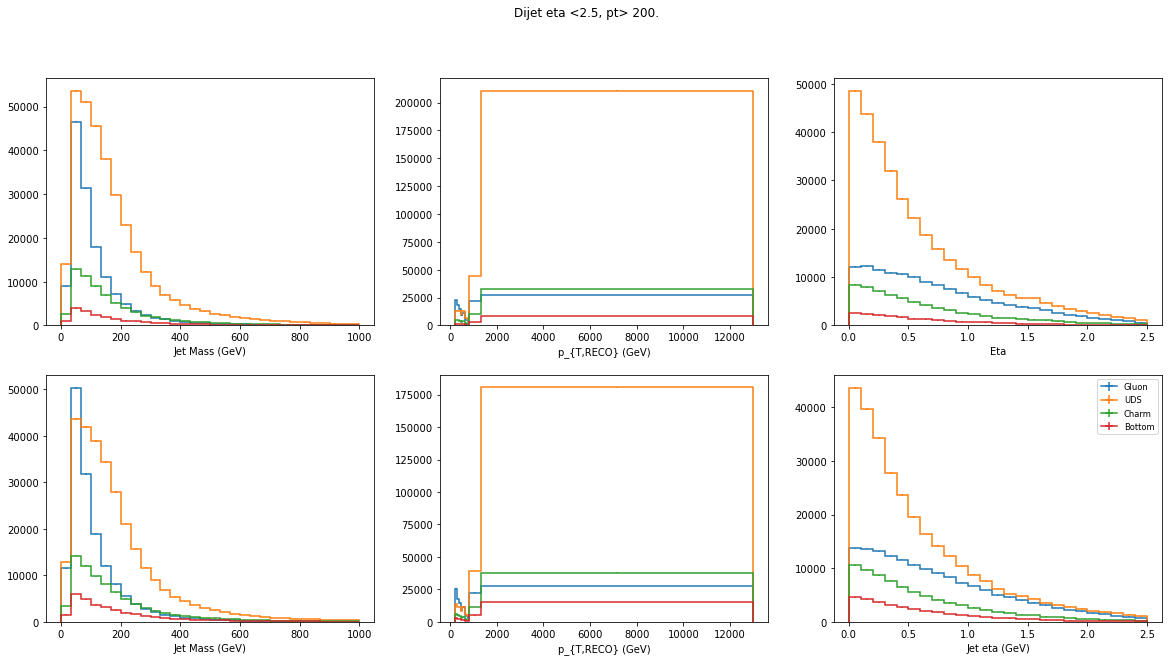

In [11]:
plt.rcParams["figure.figsize"] = (20,10)
fig, axs = plt.subplots(2, 3)
print(result['jet_mass'])
result['jet_mass'][{'jetNumb':'jet1', 'dataset':sum}].plot1d(ax = axs[0,0], overlay='partonFlav')
plt.rc('legend',fontsize='small')
plt.xlabel("Jet mass (GeV)")
result['jet_pt'][{'jetNumb':'jet1', 'dataset':sum}].plot1d(ax = axs[0,1], overlay='partonFlav')
plt.rc('legend',fontsize='small')
#axs[0].set_xlabel("Jet mass (GeV)")
plt.xlabel("Jet pT (GeV)")
result['jet_eta'][{'jetNumb':'jet1', 'dataset':sum}].plot1d(ax = axs[0,2], overlay='partonFlav')
plt.rc('legend',fontsize='small')
plt.legend()
plt.xlabel("Jet eta (GeV)")
result['jet_mass'][{'jetNumb':'jet2', 'dataset':sum}].plot1d(ax = axs[1,0], overlay='partonFlav')
plt.rc('legend',fontsize='small')
plt.xlabel("Jet mass (GeV)")
result['jet_pt'][{'jetNumb':'jet2', 'dataset':sum}].plot1d(ax = axs[1,1], overlay='partonFlav')
plt.rc('legend',fontsize='small')
#axs[0].set_xlabel("Jet mass (GeV)")
plt.xlabel("Jet pT (GeV)")
result['jet_eta'][{'jetNumb':'jet2', 'dataset':sum}].plot1d(ax = axs[1,2], overlay='partonFlav')
plt.rc('legend',fontsize='small')
plt.legend()
plt.xlabel("Jet eta (GeV)")
fig.suptitle('Dijet eta <2.5, pt> 200.', fontsize="large")

In [12]:
njets=result['cutflow']['nJets']
ngluonjets=result['cutflow']['nGluonJets']
print(result['cutflow'])
print("Gluon purity:", ngluonjets/njets)

defaultdict_accumulator(<class 'int'>, {'misses': 634931, 'matched': 567692, 'nGluonJets': 296636, 'nJets': 1135384, 'chunks': 14})
Gluon purity: 0.2612649112546944


In [13]:
response_matrix_u_values = result['response_matrix_u'].project("ptreco", "mreco", "ptgen", "mgen").values()
response_matrix_g_values = result['response_matrix_g'].project("ptreco", "mreco", "ptgen", "mgen").values()

In [14]:
nptreco,nmassreco,nptgen,nmassgen = response_matrix_u_values.shape

In [15]:
response_matrix_u_final = response_matrix_u_values.reshape( (nptreco)*(nmassreco), (nptgen)*(nmassgen) )
print(ak.max(response_matrix_u_final))

65.0


In [16]:
response_matrix_g_final = response_matrix_g_values.reshape( (nptreco)*(nmassreco), (nptgen)*(nmassgen) )

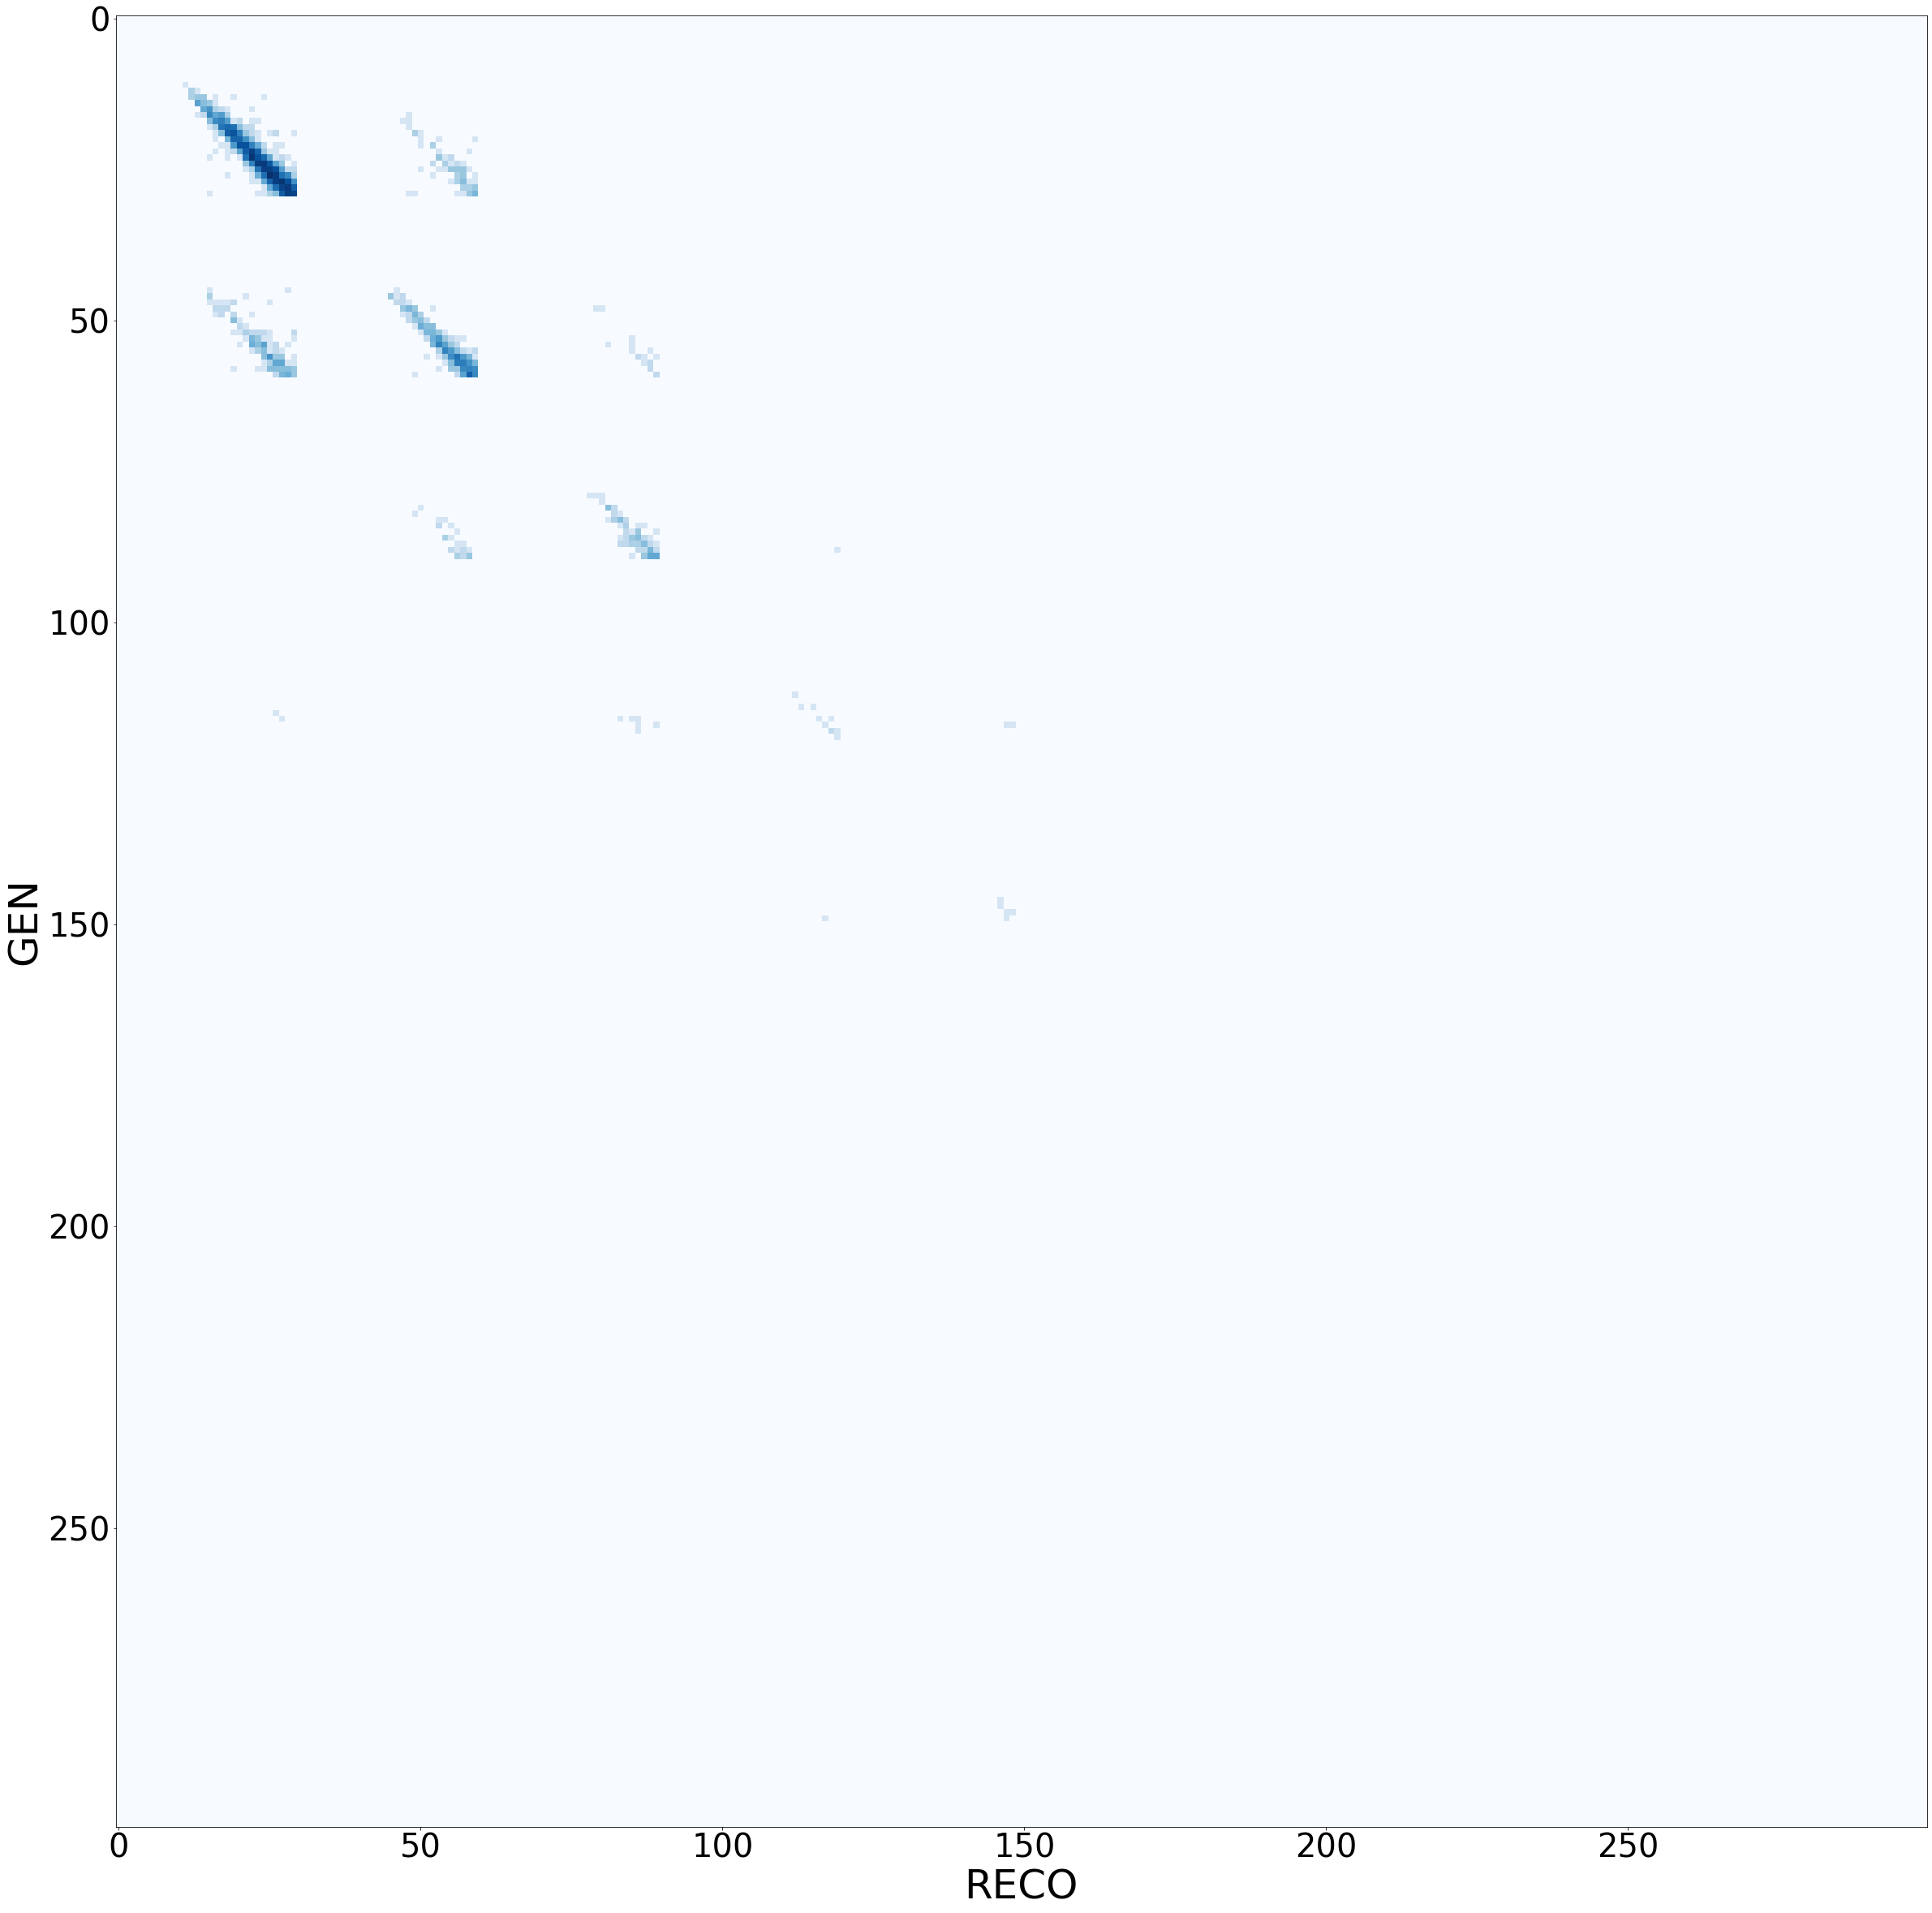

In [20]:
plt.figure(figsize = (40,80))
plt.imshow( np.log(response_matrix_u_final+1), aspect="equal", cmap="Blues" )
plt.xlabel("RECO", fontsize=50)
plt.ylabel("GEN", fontsize=50)
plt.tick_params(labelsize=40)

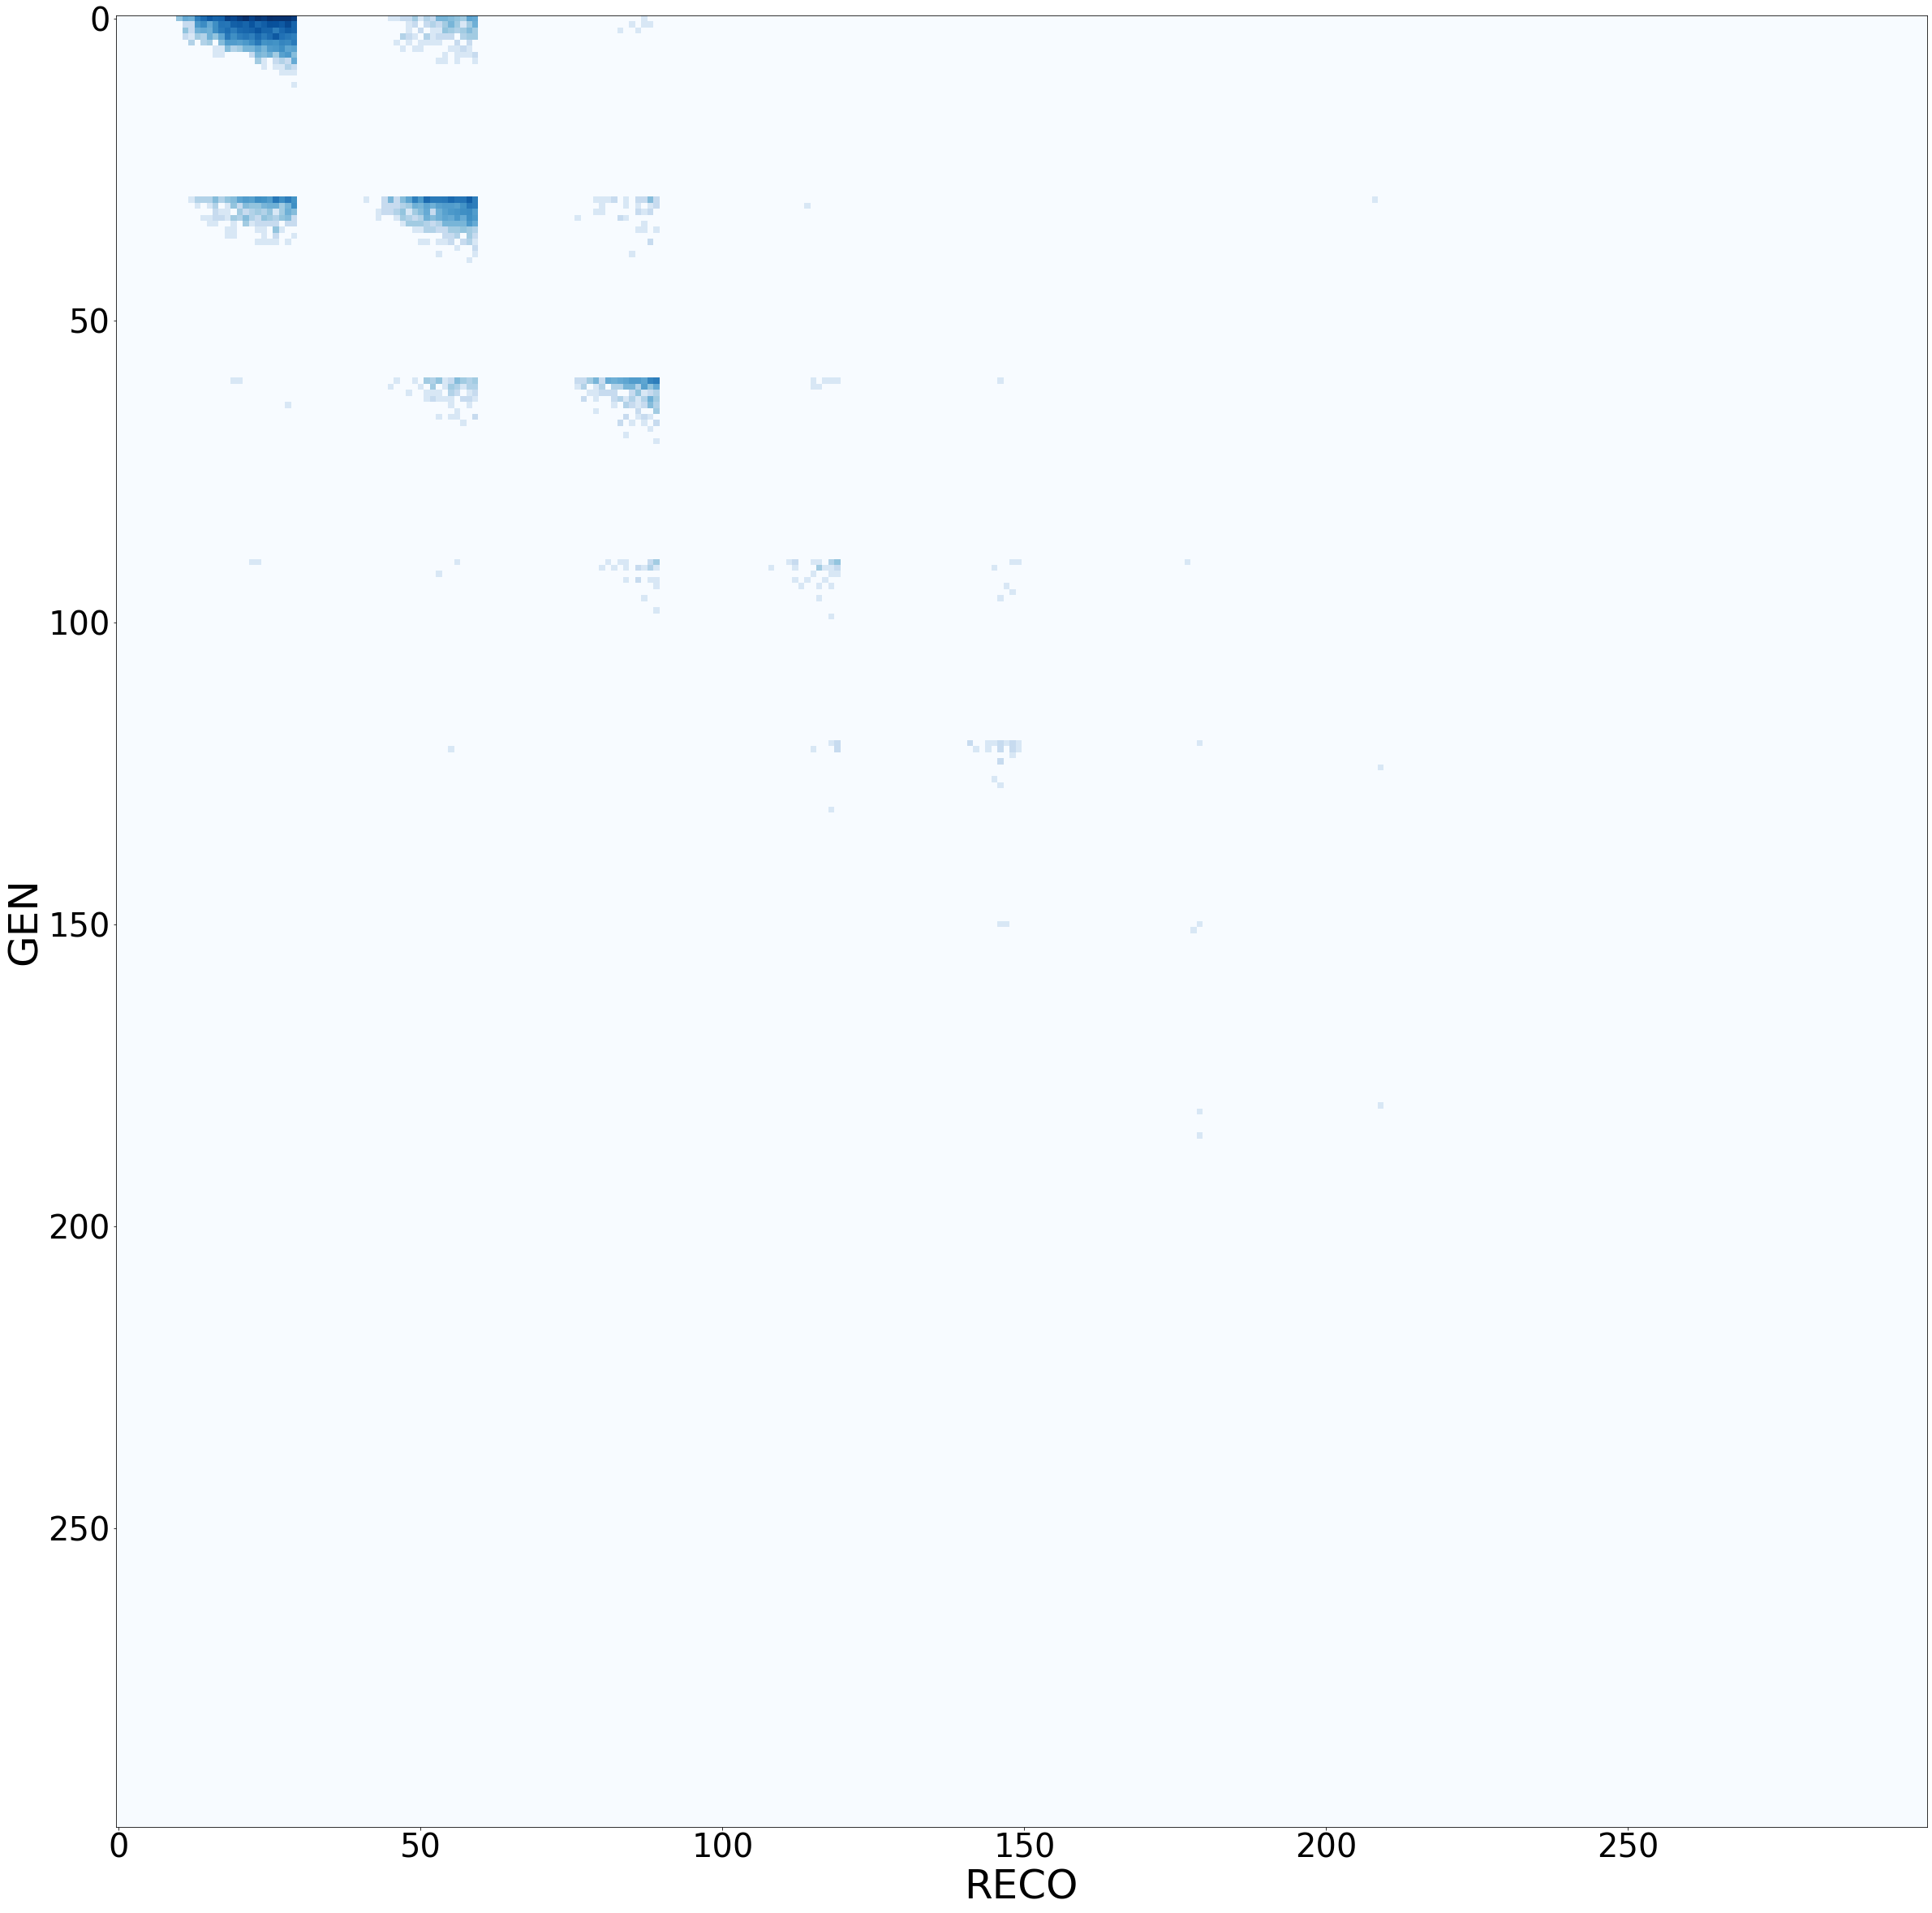

In [18]:
plt.figure(figsize = (40,80))
plt.imshow( np.log(response_matrix_g_final+1), aspect="equal", cmap="Blues" )
plt.xlabel("RECO", fontsize=50)
plt.ylabel("GEN", fontsize=50)
plt.tick_params(labelsize=40)

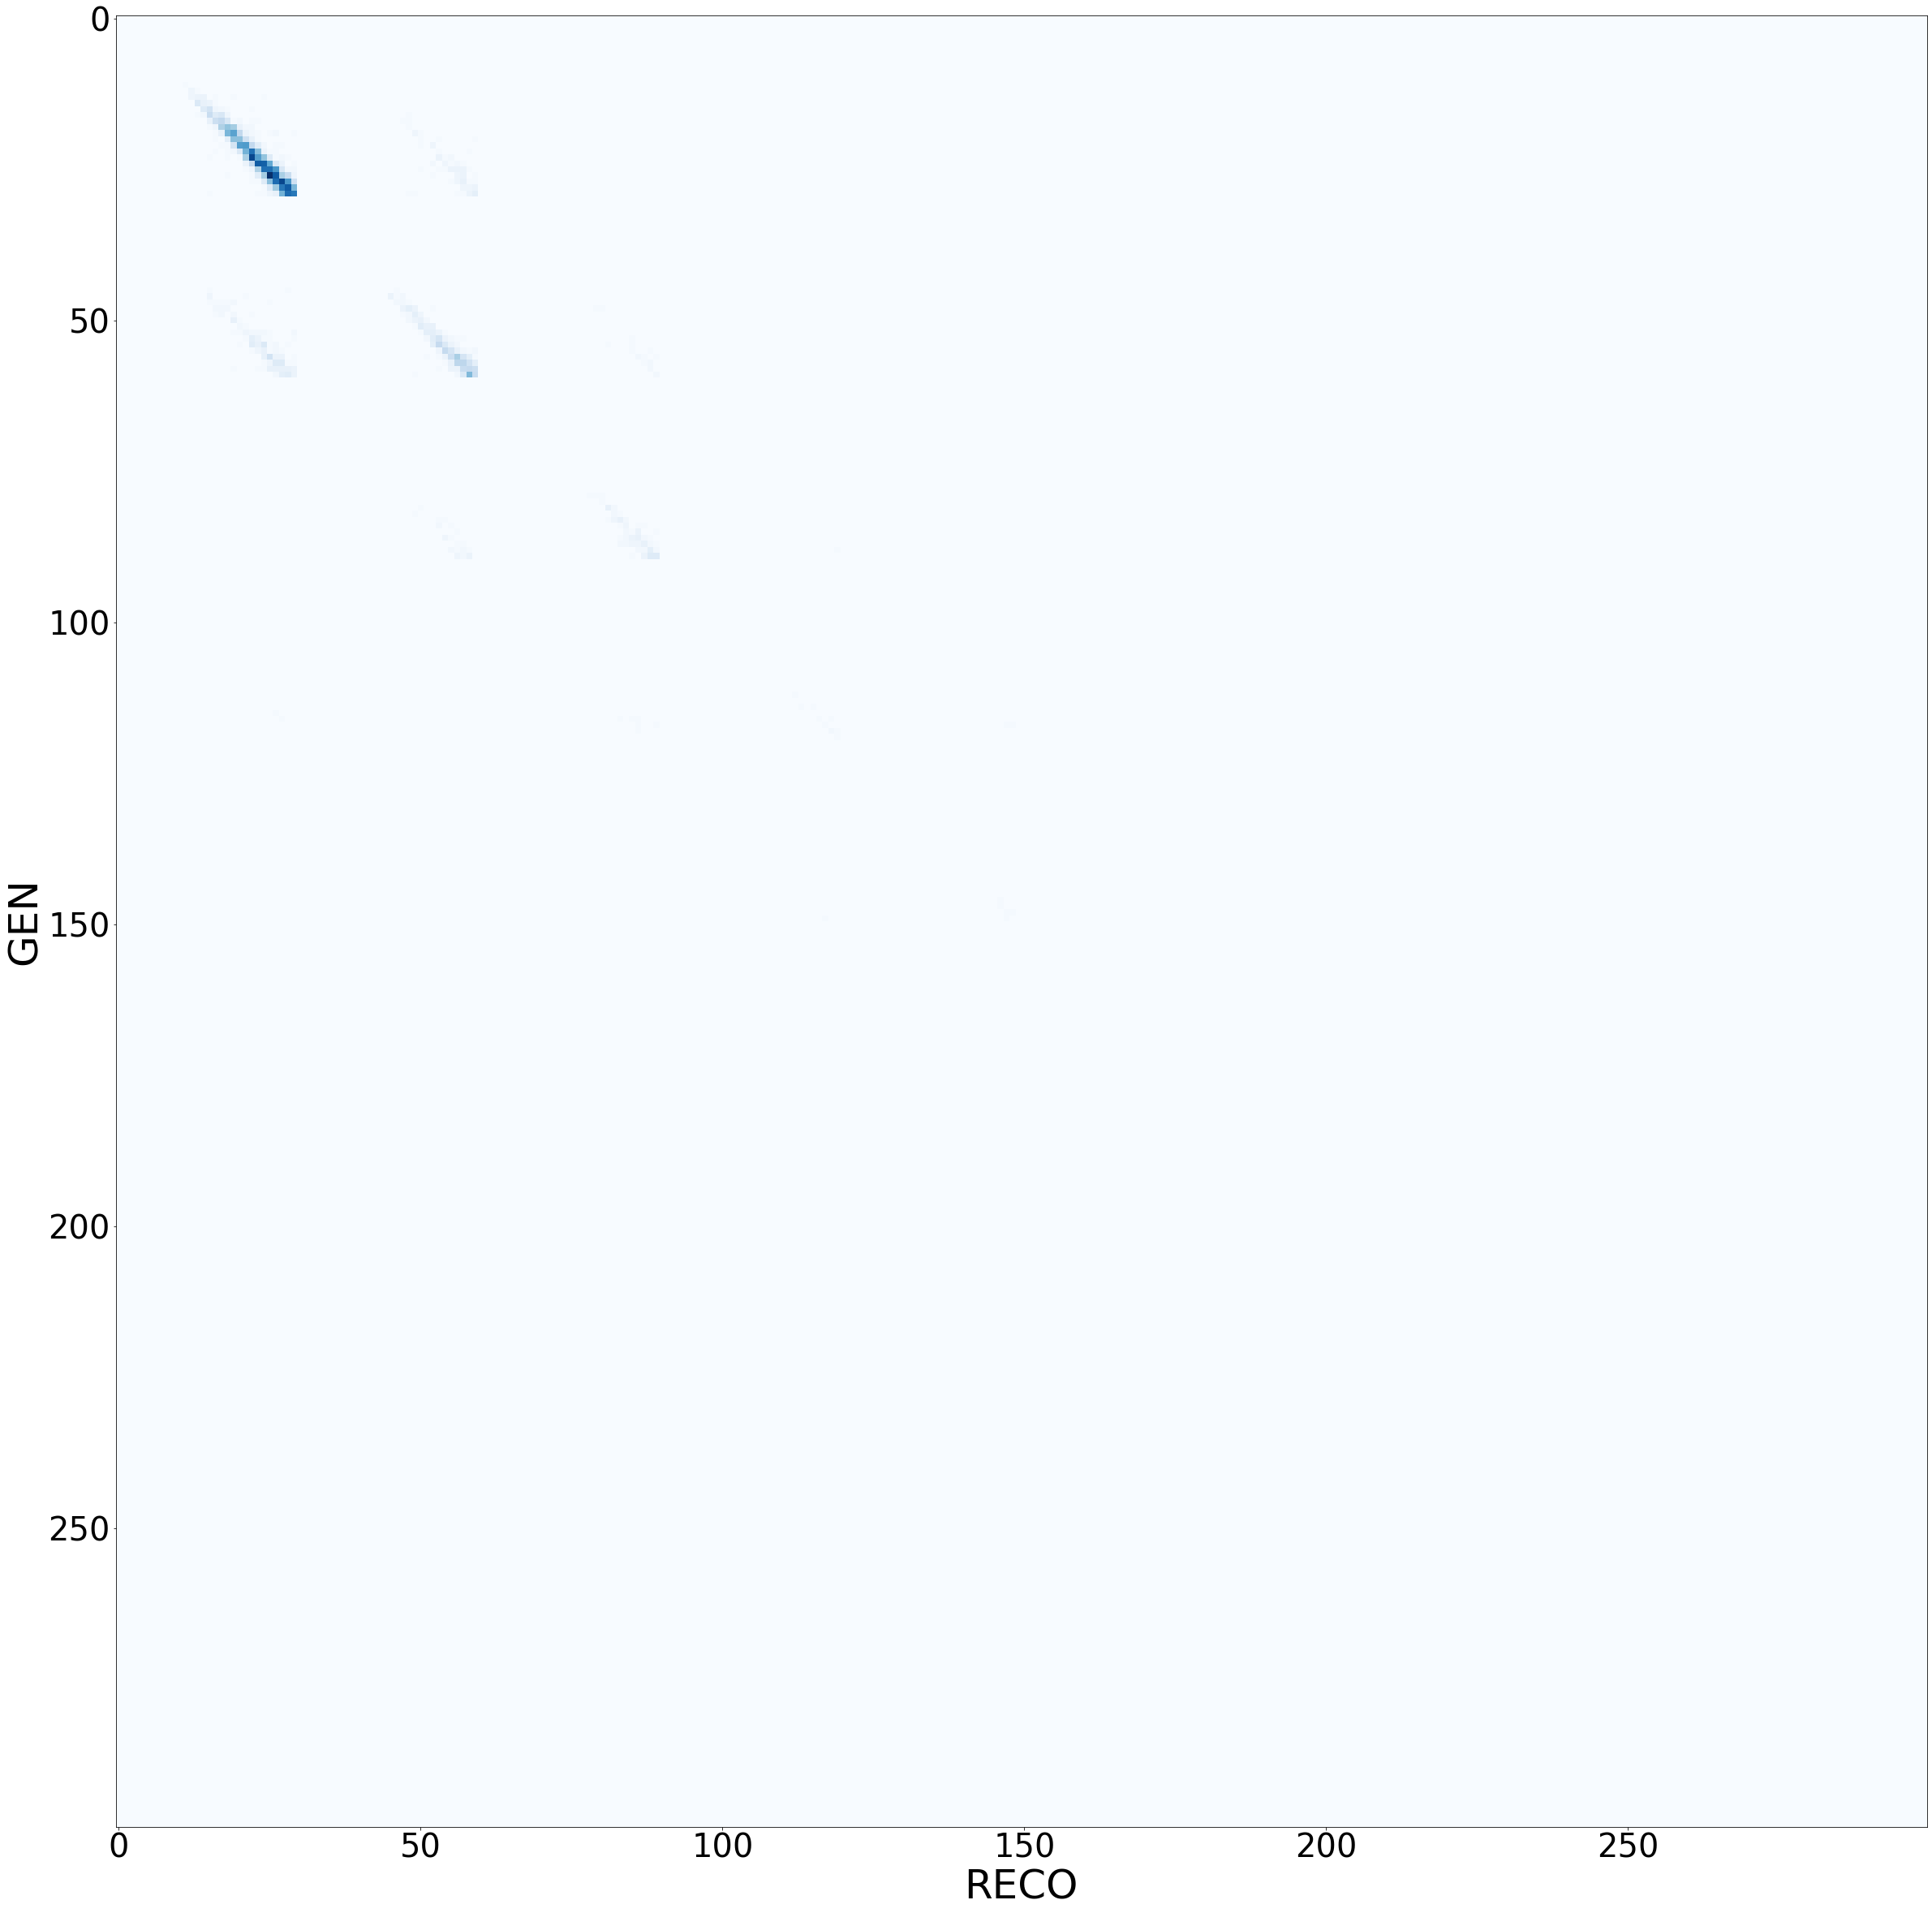

In [19]:
plt.figure(figsize = (40,80))
plt.imshow( response_matrix_u_final, aspect="equal", cmap="Blues" )
plt.xlabel("RECO", fontsize=50)
plt.ylabel("GEN", fontsize=50)
plt.tick_params(labelsize=40)

## 